## <U>MACHINE LEARNING MODELS : Brain Tumor Detections With CNN</U>

## <font color ='red'>Model ini menggunakan Convolutional Neural Network (CNN) untuk mendeteksi tumor otak dari citra MRI. Proses dimulai dengan mengimpor data citra, memberi label sebagai tumor atau non-tumor, lalu membagi data menjadi data latih, validasi, dan uji. Arsitektur CNN terdiri dari lapisan konvolusi, pooling, dan fully connected yang digunakan untuk mengenali pola visual dan melakukan klasifikasi. Setelah dilatih, model diuji untuk mengukur akurasi dan kemampuannya dalam mendeteksi tumor secara otomatis.</font>



## Gunakan Google Colab Untuk Menjalankan Program (Recommended)

In [4]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

## 1. Tahap Import Data

In [18]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):

          img = Image.open(os.path.join(directory, filename))
          img = img.resize((224, 224))
          img = img.convert('RGB')
          img = np.array(img) / 255.0
          images.append(img)
    return images

In [19]:
tumor_images = load_images('sample_data/yes')
no_tumor_images = load_images('sample_data/no')

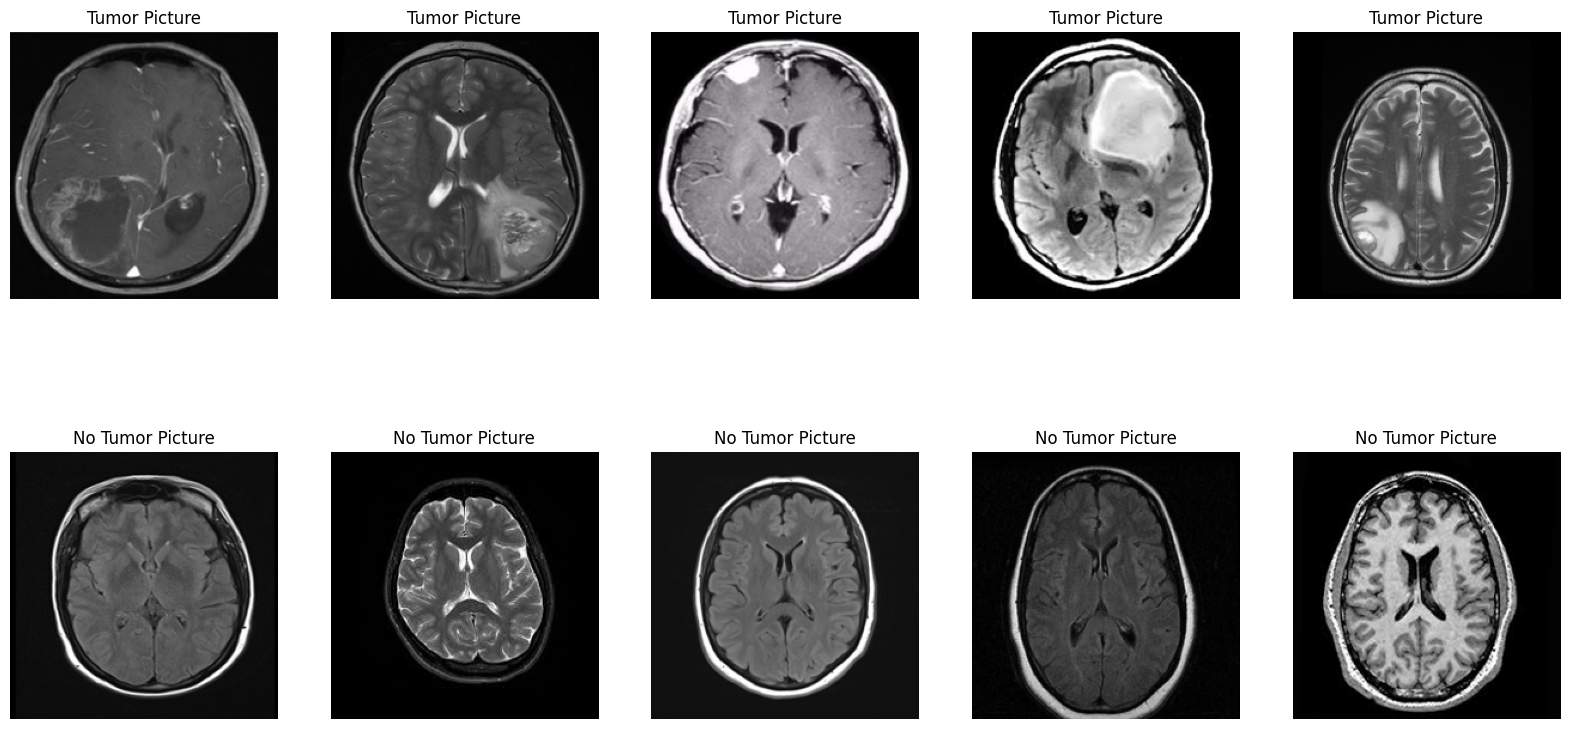

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
    axes[0, i].imshow(tumor_images[i])
    axes[0, i].set_title('Tumor Picture')
    axes[0, i].axis('off')

for i in range(5):
    axes[1, i].imshow(no_tumor_images[i])
    axes[1, i].set_title('No Tumor Picture')
    axes[1, i].axis('off')

plt.show()

In [21]:
type(tumor_images)

list

In [22]:
len(tumor_images)

155

In [23]:
len(no_tumor_images)

98

In [24]:
tumor_images

[array([[[0.68627451, 0.68627451, 0.68627451],
         [0.68627451, 0.68627451, 0.68627451],
         [0.68627451, 0.68627451, 0.68627451],
         ...,
         [0.68627451, 0.68627451, 0.68627451],
         [0.68627451, 0.68627451, 0.68627451],
         [0.68627451, 0.68627451, 0.68627451]],
 
        [[0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         ...,
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412]],
 
        [[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627]],
 
        ...,
 
        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352

## 2. Tahap Labeling

In [25]:
def assign_labels(tumor_images, no_tumor_images):
    tumor_labels = np.ones(len(tumor_images))
    no_tumor_labels = np.zeros(len(no_tumor_images))
    return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [26]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [27]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
type(tumor_labels)

numpy.ndarray

In [29]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [30]:
data

[array([[[0.68627451, 0.68627451, 0.68627451],
         [0.68627451, 0.68627451, 0.68627451],
         [0.68627451, 0.68627451, 0.68627451],
         ...,
         [0.68627451, 0.68627451, 0.68627451],
         [0.68627451, 0.68627451, 0.68627451],
         [0.68627451, 0.68627451, 0.68627451]],
 
        [[0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         ...,
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412]],
 
        [[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627]],
 
        ...,
 
        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352

In [ ]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
data[0].shape

(224, 224, 3)

## 3. Tahap Spliting Data

In [66]:
X = np.array(data)
y = np.array(labels)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

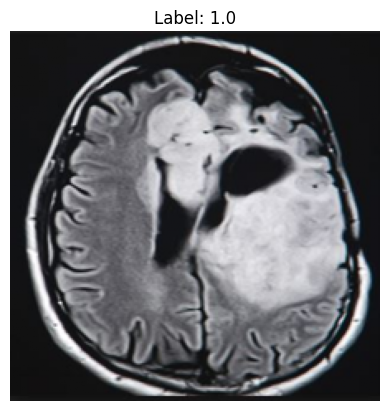

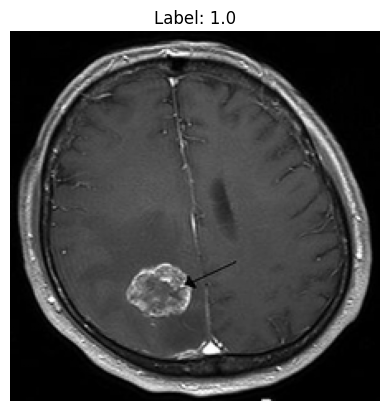

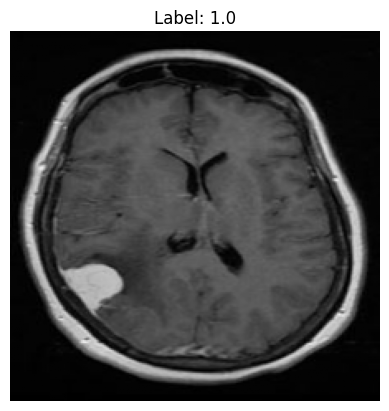

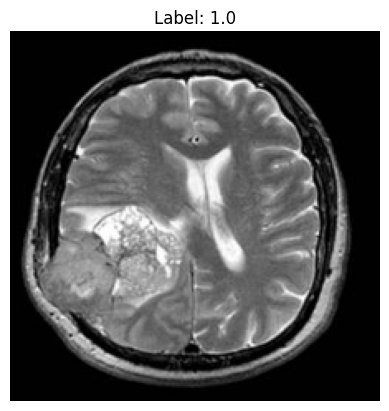

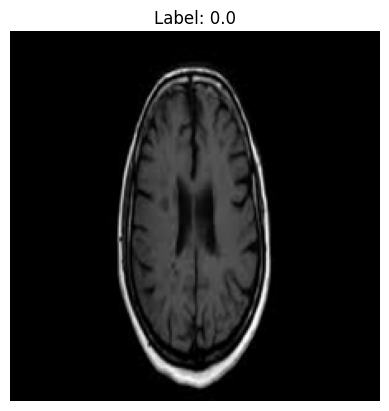

In [69]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [70]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [71]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

## 4. Tahap Training Data

In [84]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │   100,933,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [87]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6469 - loss: 10.1756 - val_accuracy: 0.9000 - val_loss: 1.3513
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7559 - loss: 3.6988 - val_accuracy: 0.9000 - val_loss: 0.8170
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6818 - loss: 3.0357 - val_accuracy: 0.9000 - val_loss: 0.5147
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7987 - loss: 1.2256 - val_accuracy: 0.9000 - val_loss: 0.3829
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8940 - loss: 0.4022 - val_accuracy: 1.0000 - val_loss: 0.0343
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9018 - loss: 0.2036 - val_accuracy: 1.0000 - val_loss: 0.0611
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9613 - loss: 0.1483 - val_accuracy: 1.0000 - val_loss: 0.0405
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9925 - loss: 0.0865 - val_accuracy: 1.0000 - val_loss: 0.0414
Epoch 9

In [88]:
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.8433 - loss: 0.4895


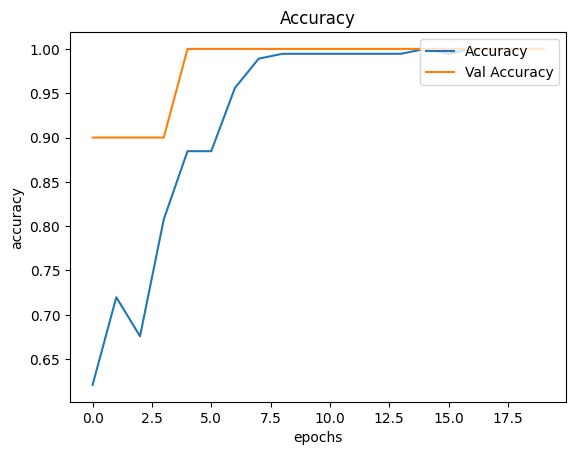

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

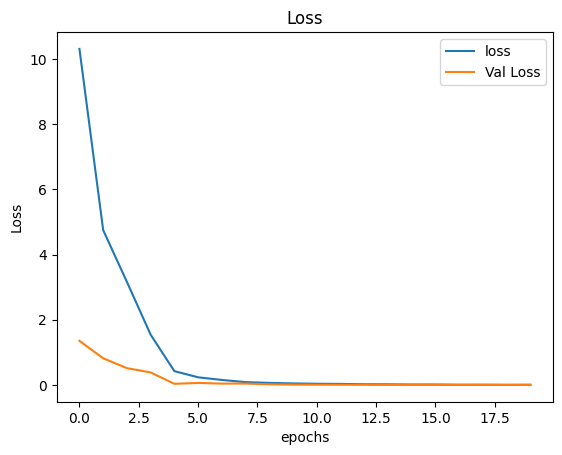

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

## 5. Tahap Testing

In [91]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"

## Tahap Pengujian/Testing Ke 1 (First Testing)

Saving Y1.jpg to Y1.jpg


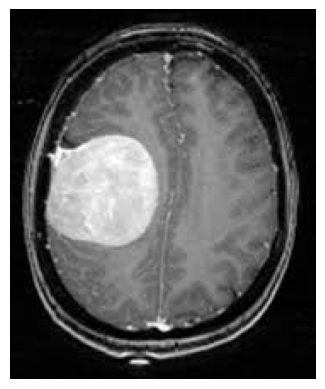

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Tumor detected


In [92]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)

## Tahap Pengujian/Testing Ke 2 (Second Testing)

Saving Y55.jpg to Y55.jpg


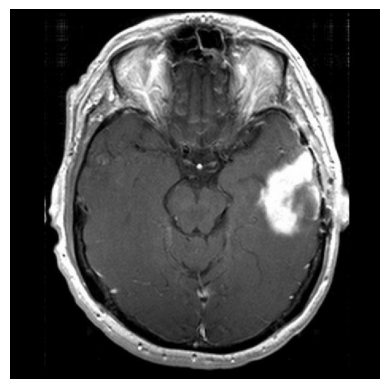

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Tumor detected


In [93]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)

## Tahap Pengujian/Testing Ke 3 (Third Testing)

Saving 28 no.jpg to 28 no.jpg


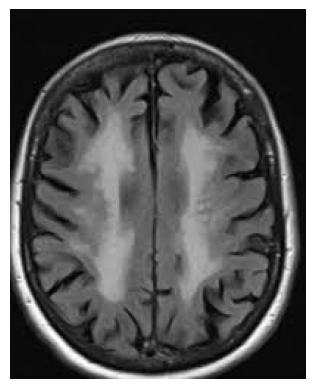

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
No tumor detected


In [94]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)

## Tahap Pengujian/Testing Ke 4 (Fourth Testing)

Saving 20 no.jpg to 20 no.jpg


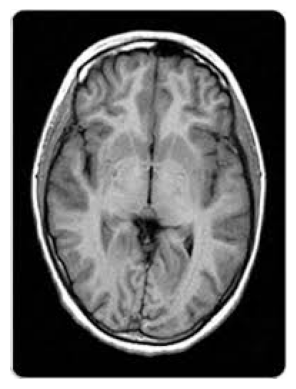

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
No tumor detected


In [96]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)